# **Computer vision and convolutional neural networks in tensorflow**

## **Inspect the data**

### Downloading the data

In [48]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-07-04 11:01:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.207, 172.253.122.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   223MB/s    in 0.5s    

2025-07-04 11:01:44 (223 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



### **Checking number of directories and files**

In [49]:
!ls

pizza_steak  pizza_steak.zip  pizza_steak.zip.1  sample_data


In [50]:
!ls pizza_steak/

test  train


In [51]:
!ls pizza_steak/train

pizza  steak


In [52]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [53]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [54]:
import os

len(os.listdir('pizza_steak/train/pizza'))

750

In [55]:
for dirpath, dirnames, filenames in os.walk('pizza_steak/'):
    print(f"There are {len(dirnames)} direcrtories and {len(filenames)} images in {dirpath}")

There are 2 direcrtories and 0 images in pizza_steak/
There are 2 direcrtories and 0 images in pizza_steak/train
There are 0 direcrtories and 750 images in pizza_steak/train/steak
There are 0 direcrtories and 750 images in pizza_steak/train/pizza
There are 2 direcrtories and 0 images in pizza_steak/test
There are 0 direcrtories and 250 images in pizza_steak/test/steak
There are 0 direcrtories and 250 images in pizza_steak/test/pizza


### **Visualising images**

#### Getting class names programmaticaly - First approach

In [56]:
import pathlib
import numpy as np

data_lib = pathlib.Path('pizza_steak/train')
classes_1st = np.array(sorted([item.name for item in data_lib.glob("*")]))
print(classes_1st)

['pizza' 'steak']


#### Getting class names programmaticaly - Second approach

In [57]:
classes_2nd = os.listdir('pizza_steak/train/')
print(classes_2nd)

['steak', 'pizza']


#### Coding the visualisation

In [58]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [59]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + '/' + target_class

    random_image = random.sample(os.listdir(target_folder), 1)[0]

    img = mpimg.imread(target_folder + '/' + random_image)
    plt.imshow(img)
    plt.title(f'{target_class} ({random_image})')
    plt.axis('off')

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)
(512, 512, 3)


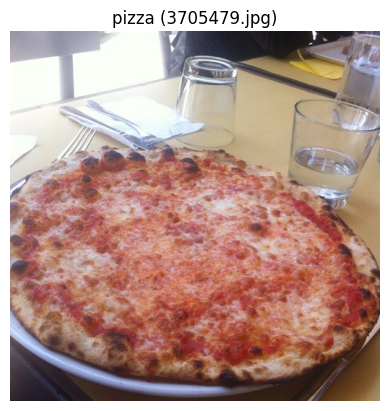

In [60]:
img = view_random_image('pizza_steak/train', 'pizza')
print(img.shape)

#### Converting an image to a tensor

In [61]:
import tensorflow as tf

In [62]:
img_tensor = tf.constant(img)
img_tensor

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[155, 151, 166],
        [153, 149, 164],
        [152, 148, 163],
        ...,
        [ 89,  84, 107],
        [ 88,  83, 106],
        [ 93,  88, 111]],

       [[154, 150, 165],
        [153, 149, 164],
        [153, 149, 164],
        ...,
        [ 90,  85, 108],
        [ 94,  88, 114],
        [104,  99, 122]],

       [[153, 149, 164],
        [153, 149, 164],
        [154, 150, 165],
        ...,
        [ 88,  84, 109],
        [ 94,  90, 117],
        [105, 101, 126]],

       ...,

       [[ 49,  38,  44],
        [ 49,  38,  44],
        [ 47,  38,  43],
        ...,
        [165, 141, 103],
        [165, 143, 102],
        [164, 142, 101]],

       [[ 49,  38,  44],
        [ 48,  37,  43],
        [ 46,  37,  42],
        ...,
        [163, 141, 102],
        [166, 144, 103],
        [167, 145, 104]],

       [[ 48,  37,  43],
        [ 48,  37,  43],
        [ 46,  37,  42],
        ...,
        [162, 140, 10

In [63]:
# Normalizing the tensor (Get all the pixel values between 0 & 1)
img_tensor/255

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.60784316, 0.5921569 , 0.6509804 ],
        [0.6       , 0.58431375, 0.6431373 ],
        [0.59607846, 0.5803922 , 0.6392157 ],
        ...,
        [0.34901962, 0.32941177, 0.41960785],
        [0.34509805, 0.3254902 , 0.41568628],
        [0.3647059 , 0.34509805, 0.43529412]],

       [[0.6039216 , 0.5882353 , 0.64705884],
        [0.6       , 0.58431375, 0.6431373 ],
        [0.6       , 0.58431375, 0.6431373 ],
        ...,
        [0.3529412 , 0.33333334, 0.42352942],
        [0.36862746, 0.34509805, 0.44705883],
        [0.40784314, 0.3882353 , 0.47843137]],

       [[0.6       , 0.58431375, 0.6431373 ],
        [0.6       , 0.58431375, 0.6431373 ],
        [0.6039216 , 0.5882353 , 0.64705884],
        ...,
        [0.34509805, 0.32941177, 0.42745098],
        [0.36862746, 0.3529412 , 0.45882353],
        [0.4117647 , 0.39607844, 0.49411765]],

       ...,

       [[0.19215687, 0.14901961, 0.17254902],
        [0.19

## **Creating the initial convolutional network model**

### Prepare the data

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

In [65]:
tf.random.set_seed(42)

In [66]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [67]:
train_data_dir = 'pizza_steak/train'
test_data_dir = 'pizza_steak/test'

In [68]:
train_data = train_datagen.flow_from_directory(
    directory = train_data_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'binary',
    seed = 42,
    # shuffle=False
)

Found 1500 images belonging to 2 classes.


In [69]:
test_data = test_datagen.flow_from_directory(
    directory = test_data_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'binary',
    seed = 42,
    # shuffle=False
)

Found 500 images belonging to 2 classes.


### Define the model

In [70]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = 'relu'
    ),
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = 'relu'
    ),
    tf.keras.layers.MaxPool2D(
        pool_size = 2,
        padding = 'valid'
    ),
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = 'relu'
    ),
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = 'relu'
    ),
    tf.keras.layers.MaxPool2D(
        pool_size = 2
    ),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [71]:
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

### Fit the model

In [25]:
history_1 = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.6410 - loss: 0.6358 - val_accuracy: 0.8580 - val_loss: 0.3587
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8260 - loss: 0.4104 - val_accuracy: 0.6200 - val_loss: 0.6279
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.7962 - loss: 0.4655 - val_accuracy: 0.8560 - val_loss: 0.3346
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.8403 - loss: 0.3960 - val_accuracy: 0.8580 - val_loss: 0.3291
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8475 - loss: 0.3597 - val_accuracy: 0.8620 - val_loss: 0.3261


In [26]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

### Comparing with regular (Dense) neural network

In [27]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [29]:
history_2 = model_2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.5086 - loss: 1.9100 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.4835 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.4945 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.5077 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [30]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

### Improving the Dense model

In [31]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation = 'relu'),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [32]:
model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [33]:
history_3 = model_3.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 451ms/step - accuracy: 0.5338 - loss: 7.7101 - val_accuracy: 0.7260 - val_loss: 0.6859
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 495ms/step - accuracy: 0.6748 - loss: 1.4281 - val_accuracy: 0.5700 - val_loss: 2.1728
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 426ms/step - accuracy: 0.7271 - loss: 0.9714 - val_accuracy: 0.7740 - val_loss: 0.4726
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 398ms/step - accuracy: 0.7949 - loss: 0.4651 - val_accuracy: 0.7800 - val_loss: 0.4689
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 426ms/step - accuracy: 0.7298 - loss: 0.6558 - val_accuracy: 0.7240 - val_loss: 0.6443


In [34]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## **Breaking the CNN down**

### **Visualizing the images**

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


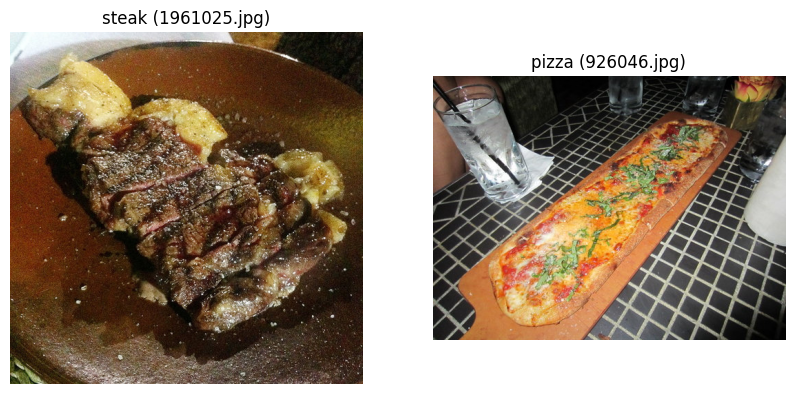

In [35]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train', 'pizza')
# plt.show()

### **Preprocess the data**

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [37]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [38]:
img = load_img("pizza_steak/train/pizza/1008104.jpg", target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

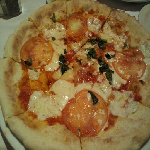

In [39]:
img

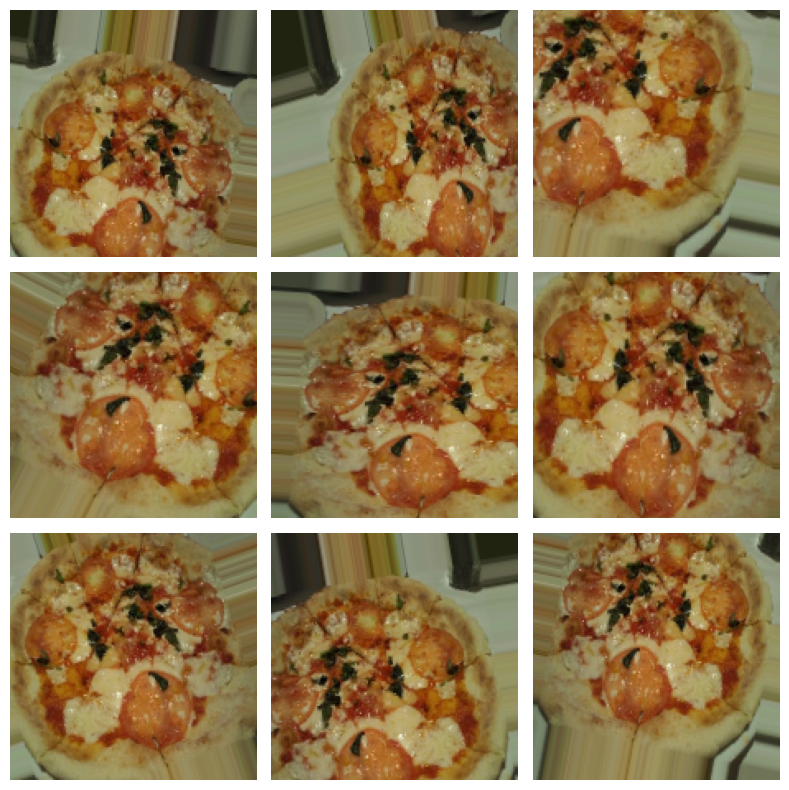

In [40]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
i = 0
for batch in datagen.flow(x, batch_size=1):
    ax = axs[i // 3, i % 3]
    ax.imshow(batch[0] / 255.)
    ax.axis('off')
    i += 1
    if i >= 9:
        break
plt.tight_layout()
plt.show()

In [41]:
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [42]:
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'binary',
    seed = 42
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'binary',
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [43]:
images, labels = next(train_data)

In [44]:
len(images), len(labels)

(32, 32)

In [45]:
images[0]

array([[[0.42352945, 0.43137258, 0.34509805],
        [0.3137255 , 0.32941177, 0.2392157 ],
        [0.26666668, 0.28235295, 0.18431373],
        ...,
        [0.42352945, 0.34509805, 0.3803922 ],
        [0.427451  , 0.34901962, 0.39607847],
        [0.45098042, 0.36862746, 0.427451  ]],

       [[0.2901961 , 0.30588236, 0.21568629],
        [0.45882356, 0.47450984, 0.37647063],
        [0.2627451 , 0.28627452, 0.18431373],
        ...,
        [0.39607847, 0.34117648, 0.34117648],
        [0.4156863 , 0.36862746, 0.38431376],
        [0.39607847, 0.34901962, 0.3647059 ]],

       [[0.3647059 , 0.40000004, 0.29411766],
        [0.38823533, 0.42352945, 0.31764707],
        [0.30588236, 0.34117648, 0.23529413],
        ...,
        [0.34509805, 0.3254902 , 0.30980393],
        [0.30980393, 0.29803923, 0.2784314 ],
        [0.3372549 , 0.3254902 , 0.30588236]],

       ...,

       [[0.5137255 , 0.5019608 , 0.54509807],
        [0.52156866, 0.50980395, 0.54509807],
        [0.5294118 , 0

### **Build a base model**

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, Input
from tensorflow.keras.optimizers import Adam

In [47]:
model_4_base = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(
        filters = 10,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = 'valid',
        activation = 'relu',
        input_shape = (224, 224, 3)
    ),
    Conv2D(
        filters = 10,
        kernel_size = (3, 3),
        activation = 'relu'
    ),
    Conv2D(
        filters = 10,
        kernel_size = (3, 3),
        activation = 'relu'
    ),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model_4_base.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [74]:
model_4_base.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history_4_base = model_4_base.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.5898 - loss: 3.2311 - val_accuracy: 0.7400 - val_loss: 0.5289
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.7452 - loss: 0.5438 - val_accuracy: 0.8300 - val_loss: 0.3956
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.8065 - loss: 0.4373 - val_accuracy: 0.8500 - val_loss: 0.3854
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.8080 - loss: 0.4261 - val_accuracy: 0.8320 - val_loss: 0.3844
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.8439 - loss: 0.3783 - val_accuracy: 0.8620 - val_loss: 0.3258


In [89]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 987ms/step - accuracy: 0.4774 - loss: 0.6942


[0.6931323409080505, 0.5220000147819519]

In [90]:
model_2.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.4787 - loss: 0.6933


[0.6931515336036682, 0.5]

In [91]:
model_3.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.7225 - loss: 0.6477


[0.6443376541137695, 0.7239999771118164]

In [92]:
model_4_base.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 791ms/step - accuracy: 0.8917 - loss: 0.3012


[0.3258310854434967, 0.8619999885559082]

In [88]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### **Evaluating the model**